In [7]:
import pandas as pd
import numpy as np

In [8]:
# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
df_bitcoin = pd.read_csv("Bitcoin_data.csv", index_col = 0)
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_bitcoin.set_index('Date', inplace=True)
df_bitcoin.head(5)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2019-07-15,10257.84,11052.77,9992.01,10895.09,"25,384,047,207","194,147,627,475"
2019-07-14,11381.02,11451.20,10234.58,10256.06,"22,486,000,001","182,741,933,552"
2019-07-13,11813.13,11841.96,10908.48,11392.38,"21,042,616,384","202,968,191,001"
2019-07-12,11354.30,11905.49,11179.14,11815.99,"23,534,692,797","210,494,417,832"
2019-07-11,12139.71,12144.62,11158.92,11358.66,"28,595,327,690","202,324,174,692"


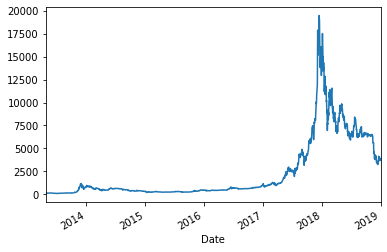

In [9]:
df_bitcoin_train = df_bitcoin.loc[:"2019-01-1",["Close"]]
df_bitcoin_test = df_bitcoin.loc["2019-01-2":,["Close"]]
df_bitcoin_train['Close'].plot()

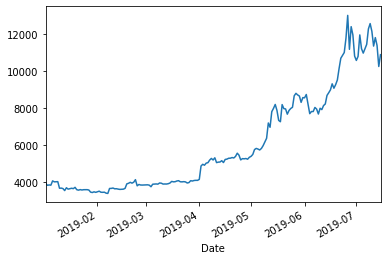

In [10]:
df_bitcoin_test['Close'].plot()

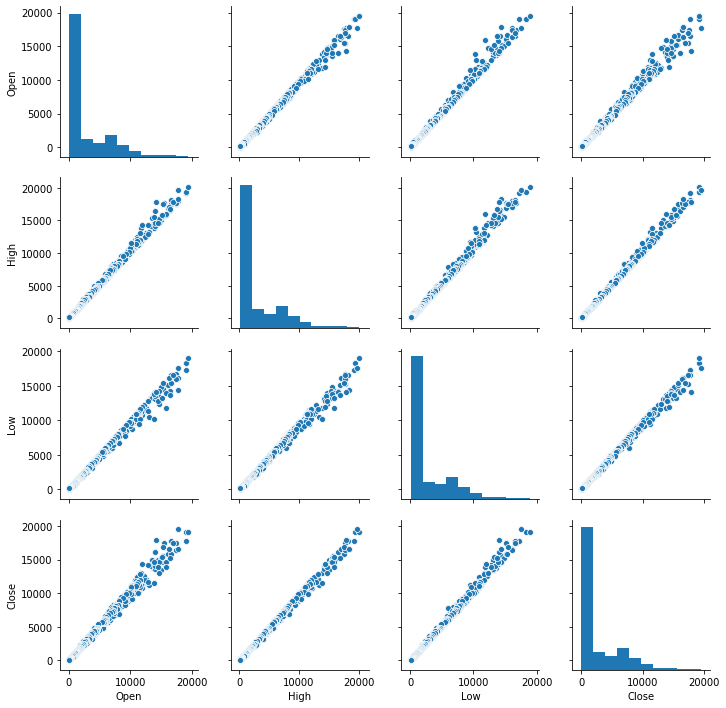

In [11]:
sns.pairplot(df_bitcoin)